In [1]:
# Read data and aggregate into monthly sale_cnt

import pandas as pd

train_df = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')
# columns: date, date_block_num, shop_id, item_id, item_price, item_cnt_day
train_monthly_df = train_df.groupby(['date_block_num','shop_id','item_id']).agg(item_cnt_month=('item_cnt_day','sum')).reset_index()
train_monthly_df['shop_item'] = train_monthly_df['shop_id'].astype('string') + '-' + train_monthly_df['item_id'].astype('string')
shop_item_list = pd.unique(train_monthly_df['shop_item'])
print("cnt of shop_item:",len(shop_item_list))
train_monthly_df

cnt of shop_item: 424124


,date_block_num,shop_id,item_id,item_cnt_month,shop_item
0,0,0,32,6.0,0-32
1,0,0,33,3.0,0-33
2,0,0,35,1.0,0-35
3,0,0,43,1.0,0-43
4,0,0,51,2.0,0-51
...,...,...,...,...,...
1609119,33,59,22087,6.0,59-22087
1609120,33,59,22088,2.0,59-22088
1609121,33,59,22091,1.0,59-22091
1609122,33,59,22100,1.0,59-22100


In [2]:
# get the sequence of each shop_item

import numpy as np

data_seq_dict = {}
for shop_item in shop_item_list:
    data_seq_dict[shop_item] = [0.0 for i in range(0,34)]
for _, row in train_monthly_df.iterrows():
    data_seq_dict[row['shop_item']][int(row['date_block_num'])] = row['item_cnt_month']

data_seq_array = np.array(list(data_seq_dict.values()))
print(data_seq_array)
print(data_seq_array.shape)

[[ 6. 10.  0. ...  0.  0.  0.]
 [ 3.  3.  0. ...  0.  0.  0.]
 [ 1. 14.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0.  2.]
 [ 0.  0.  0. ...  0.  0.  1.]]
(424124, 34)


In [5]:
# # get the default sequence for items: calculate the average sale_cnt as default sequence for items

# item_seq_dict = {}
# item_seq_num_dict = {}
# for k, v in data_seq_dict.items():
#     item = k.split('-')[1]
#     if item not in item_seq_dict.keys():
#         item_seq_dict[item] = v
#         item_seq_num_dict[item] = 1
#     else:
#         item_seq_dict[item] = item_seq_dict[item] + v
#         item_seq_num_dict[item] += 1
# for item in item_seq_dict.keys():
#     item_seq_dict[item] = [e / item_seq_num_dict[item] for e in item_seq_dict[item]]

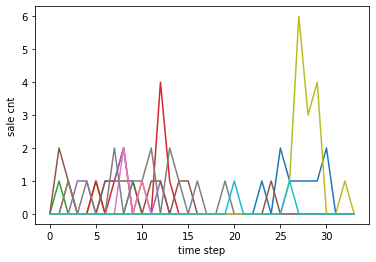

In [3]:
# plot curve

import matplotlib.pyplot as plt

row_random_array = np.arange(data_seq_array.shape[0])
np.random.shuffle(row_random_array)
row_random = data_seq_array[row_random_array[0:10]]
for seq in row_random:
    plt.plot(seq)
plt.xlabel('time step')
plt.ylabel('sale cnt')
plt.show()

In [7]:
# # Stationary Test - ADF
# # API: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

# from statsmodels.tsa.stattools import adfuller

# import warnings
# warnings.filterwarnings('ignore')

# stationary_cnt = 0
# not_stationary_cnt = 0
# for seq in data_seq_array[:1000,:]:
#     dftest = adfuller(seq,autolag='AIC',maxlag=14)
#     # print(dftest)
#     # dftest results: 
#     # - adf statistic
#     # - pvalue
#     # - usedlag: order of lag
#     # - nobs：Number of Observations Used for ADF regression and calculate threshold
#     # - icbest：return max info value if autolag is not none
#     # - restore: merge results into a dummy
    
#     if result[1] <= 0.05 and dftest[0] < dftest[4]['1%']:
#         # print("It is Stationary")
#         stationary_cnt += 1
#     else:
#         # print("Not Stationary")
#         not_stationary_cnt += 1
# print("stationary:", stationary_cnt)
# print("not stationary:", not_stationary_cnt)

stationary: 1000
not stationary: 0


In [7]:
# # Stationary Test - KPSS
# # API: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.kpss.html

# from statsmodels.tsa.stattools import kpss

# stationary_cnt = 0
# not_stationary_cnt = 0
# for seq in data_seq_array[:1000,:]:
#     kpsstest = kpss(seq)
#     # print(kpsstest)
#     # results: 
#     # - kpss statistic
#     # - pvalue
#     # - lags
#     # - crit
#     # - restore
#     if kpsstest[1] > 0.05 and kpsstest[0] < kpsstest[3]['1%']:
#         # print("It is Stationary")
#         stationary_cnt += 1
#     else:
#         # print("Not Stationary")
#         not_stationary_cnt += 1
# print("stationary:", stationary_cnt)
# print("not stationary:", not_stationary_cnt)

(0.3740560208705203, 0.08833792203856883, 2, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
stationary: 1
not stationary: 0


In [11]:
# # ACF and PACF

# # plot ACF and PACF
# from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# seq = data_seq_array[0,:]

# fig = plt.figure(figsize=(12,8))
# ax1 = fig.add_subplot(211)
# fig = plot_acf(seq, lags=33, ax=ax1)
# ax2 = fig.add_subplot(212)
# fig = plot_pacf(seq, lags=16, ax=ax2)


# # calculate ACF and PACF
# from statsmodels.tsa.stattools import acf, pacf

# for seq in data_seq_array[:3,:]:
#     acf_value = acf(seq)
#     pacf_value = pacf(seq)
#     print('ACF:', acf_value)
#     print('PACF:', pacf_value)
#     print('------------------------------------')

ACF: [ 1.          0.42867916 -0.00344753 -0.0051713  -0.00689507 -0.00861883
 -0.0103426  -0.01206637 -0.01379013 -0.0155139  -0.01723766 -0.01896143
 -0.0206852  -0.02240896 -0.02413273 -0.0258565 ]
PACF: [ 1.          0.44166944 -0.2468977   0.13943399 -0.09075573  0.04537503
 -0.03897979  0.00969045 -0.02231605 -0.00570718 -0.01878874 -0.01418569
 -0.02062963 -0.02077848 -0.02520055 -0.02758115]
------------------------------------
ACF: [ 1.          0.49816176 -0.00367647 -0.00551471 -0.00735294 -0.00919118
 -0.01102941 -0.01286765 -0.01470588 -0.01654412 -0.01838235 -0.02022059
 -0.02205882 -0.02389706 -0.02573529 -0.02757353]
PACF: [ 1.          0.51325758 -0.36295369  0.28610321 -0.25974471  0.23284069
 -0.2461617   0.24252102 -0.29488947  0.33606181 -0.50031503  0.87967314
 -7.37587583 -1.14599317  0.52556253 -0.39903641]
------------------------------------
ACF: [ 1.          0.04007143 -0.00204469 -0.00306704 -0.00408938 -0.00511173
 -0.00613408 -0.00715642 -0.00817877 -0.00

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   34
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -66.285
Date:                Mon, 07 Nov 2022   AIC                            138.570
Time:                        16:14:19   BIC                            143.149
Sample:                             0   HQIC                           140.131
                                 - 34                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6370      1.203      0.530      0.596      -1.720       2.994
ar.L1          0.5448      0.094      5.805      0.000       0.361       0.729
sigma2         2.8601      0.406      7.042      0.0

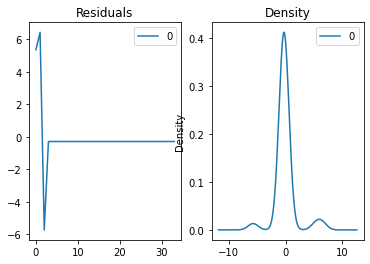

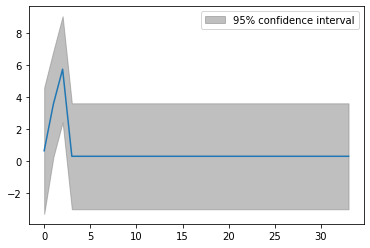

In [26]:
# ARIMA: automatically select order and fit model

from statsmodels.tsa.stattools import arma_order_select_ic
# API: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.arma_order_select_ic.html
from statsmodels.tsa.arima.model import ARIMA
# API: https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html
from statsmodels.graphics.tsaplots import plot_predict
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


for seq in data_seq_array[:1,:]:
    # fit model
    order_res = arma_order_select_ic(seq)
    order = (order_res['bic_min_order'][0], 0, order_res['bic_min_order'][1])
    model = ARIMA(seq, order=order)
    model_fit = model.fit()
    print(model_fit.summary())
    
    # Plot residual errors
    residuals = pd.DataFrame(model_fit.resid)
    fig, ax = plt.subplots(1,2)
    residuals.plot(title="Residuals", ax=ax[0])
    residuals.plot(kind='kde', title='Density', ax=ax[1])
    plt.show()
    
    ######################here! try plot actual and fitted in the same graph
    # Actual vs Fitted
    plot_predict(model_fit, dynamic=False)
    plt.show()
    ################# try get result from arima and submit result

In [ ]:
from sklearn.model_selection import train_test_split

X = data_seq_array[:,0:-1]
Y = data_seq_array[:,1:]
X = X.reshape((X.shape[0], X.shape[1], 1))
Y = Y.reshape((Y.shape[0], Y.shape[1], 1))
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3)

In [ ]:
# # LSTM

# import tensorflow as tf
# from tensorflow.keras import backend as K
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.metrics import RootMeanSquaredError

# def root_mean_squared_error(y_true, y_pred):
#     return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# model = Sequential()
# model.add(LSTM(1, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
# model.compile(loss=root_mean_squared_error, optimizer=Adam(learning_rate=0.1), metrics=[RootMeanSquaredError()])
# model.summary()

# model.fit(x=X_train, y=Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=1024*256)

In [ ]:
# # Seq2seq variant 
# # 1. step_size = 1 for output
# # 2. substitue <EOS> with the last word

# import tensorflow as tf
# from tensorflow.keras import backend as K
# from tensorflow.keras.models import Sequential
# from tensorflow.keras import Model
# from tensorflow.keras import Input
# from tensorflow.keras.layers import LSTM, Lambda
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.metrics import RootMeanSquaredError

# def root_mean_squared_error(y_true, y_pred):
#     return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# input_encoder_vec = Input(name='input', shape = (X_train.shape[1], X_train.shape[2]))
# encoder1_vec = LSTM(1, return_sequences=True, name='encoder1')(input_encoder_vec)
# encoder2_vec = LSTM(1, return_sequences=True, name='encoder2')(encoder1_vec)
# encoder3_vec = LSTM(1, return_sequences=True, name='encoder3')(encoder2_vec)
# encoder4_vec, hidden_state_vec, cell_state_vec = LSTM(1, return_sequences=False, return_state=True, name='encoder4')(encoder3_vec)
# input_decoder_vec = Lambda(lambda x: tf.slice(x, (0, X_train.shape[1]-1,0), (-1,1,1)))(input_encoder_vec)
# decoder_vec = LSTM(1, return_sequences=True, name='decoder')(input_decoder_vec, initial_state=[hidden_state_vec, cell_state_vec])
# model = Model(inputs=[input_encoder_vec], outputs=[decoder_vec])
# model.compile(loss=root_mean_squared_error, optimizer=Adam(learning_rate=0.1), metrics=[RootMeanSquaredError()])
# model.summary()

# model.fit(x=X_train, y=Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=1024*256)

In [ ]:
# DeepAR


In [ ]:
test_df = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv').set_index('ID')
test_df['shop_item'] = test_df['shop_id'].astype('string') + '-' + test_df['item_id'].astype('string')

X_test = []
for _, row in test_df.iterrows():
    shop_item = str(row['shop_id']) + '-' + str(row['item_id'])
    if shop_item in data_seq_dict.keys():
        X_test.append(data_seq_dict[shop_item])
    elif row['item_id'] in item_seq_dict.keys():
        X_test.append(item_seq_dict[row['item_id']])
        print(row['item_id'])
    else:
        X_test.append([0.0 for i in range(0,34)])
X_test = np.asarray(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_test = X_test[:,1:,:]

In [ ]:
pred = model.predict(X_test)

pred = pred[:,-1:,:]
pred = pred.reshape((pred.shape[0]))

In [ ]:
submission_df = pd.DataFrame(pred, columns=['item_cnt_month'])
submission_df.index.name = 'ID'
submission_df

In [ ]:
submission_df.to_csv('/kaggle/working/submission.csv')